In [1]:
import numpy as np
import matplotlib.pyplot as plt

from my_lib.utility import *

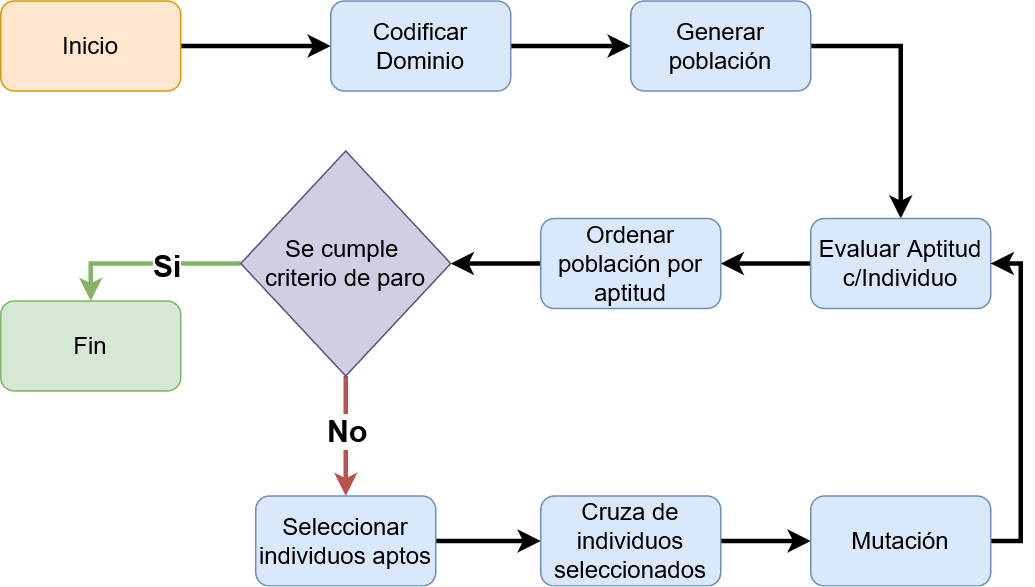

In [ ]:
crit_1 = 10 # 10 generaciones
apt_umb = 0.7

## Codificar dominio

In [2]:
#Generar espacio de soluciones
espacio_busqueda_src = np.linspace(-1,1,64)

#Definir la función de aptitud/costo
def costo(x):
    return x**2

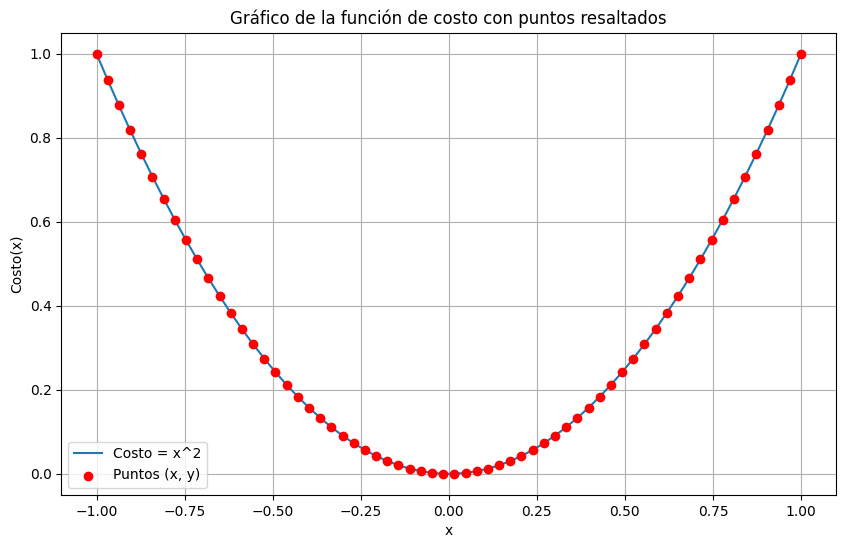

In [3]:
# Evaluar la función de costo para cada valor en conjunto_solucion
valores_costo = costo(espacio_busqueda_src)

# Establecer el tamaño de la gráfica
plt.figure(figsize=(10, 6))  # 10 pulgadas de ancho, 6 pulgadas de alto

# Graficar la función de costo
plt.plot(espacio_busqueda_src, valores_costo, label='Costo = x^2')

# Resaltar los puntos x,y en la gráfica con scatter
plt.scatter(espacio_busqueda_src, valores_costo, color='red', label='Puntos (x, y)', zorder=5)

# Añadir etiquetas y leyendas
plt.xlabel('x')
plt.ylabel('Costo(x)')
plt.title('Gráfico de la función de costo con puntos resaltados')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

### Codificación del dominio

In [4]:
#Normalizar espacio de busqueda valores [0-63]
espacio_busqueda_norm = normalizar(espacio_busqueda_src,0,63)

#Codificar a binario las soluciones del espacio de busqueda
espacio_busqueda_bin = binarizar(nbites=6,datos=espacio_busqueda_norm)

### Almacenar espacio de busqueda en una matriz

In [5]:
#Definir matriz con 4 columnas
espacio_busqueda = np.zeros((espacio_busqueda_src.shape[0],4), dtype=object)

#Pirmer columna para el valor real
espacio_busqueda[:,0] = espacio_busqueda_src

#Segunda columna para el valor normalizado
espacio_busqueda[:,1] = np.round(espacio_busqueda_norm, decimals=0)

#Tercer columna para el valor en binario
espacio_busqueda [:,2] = espacio_busqueda_bin

#Cuarta columna para la aptitud de cada inidividuo
espacio_busqueda [:,3] = [costo(x) for x in espacio_busqueda_src]

print(espacio_busqueda)


[[-1.0 0.0 '000000' 1.0]
 [-0.9682539682539683 1.0 '000001' 0.9375157470395565]
 [-0.9365079365079365 2.0 '000010' 0.8770471151423532]
 [-0.9047619047619048 3.0 '000011' 0.8185941043083901]
 [-0.873015873015873 4.0 '000100' 0.762156714537667]
 [-0.8412698412698413 5.0 '000101' 0.7077349458301839]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [-0.7777777777777778 7.0 '000111' 0.6049382716049383]
 [-0.746031746031746 8.0 '001000' 0.5565633660871756]
 [-0.7142857142857143 9.0 '001001' 0.5102040816326531]
 [-0.6825396825396826 10.0 '001010' 0.46586041824137064]
 [-0.6507936507936508 11.0 '001011' 0.4235323759133283]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5873015873015873 13.0 '001101' 0.344923154446964]
 [-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [-0.4920634920634921 16.0 '010000' 0.24212648022171834]
 [-0.46031746031746035 17.0 '010001' 0.2118921642731167]
 [-0.4285714285714286 18.0 '010010'

## Generar la población

En este caso se genera de manera aleatoria, se seleccionan 10 individuos al azar del espacio de busqueda

In [6]:
#Generar una población inicial con 10 inidividuos de manera aleatoria
poblacion = generar_poblacion(espacio_busqueda,10)
print("Población inicial")
print(poblacion)

Población inicial
[[0.11111111111111116 35.0 '100011' 0.01234567901234569]
 [-0.1428571428571429 27.0 '011011' 0.020408163265306135]
 [-0.4920634920634921 16.0 '010000' 0.24212648022171834]
 [-0.3650793650793651 20.0 '010100' 0.13328294280675235]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.4920634920634921 47.0 '101111' 0.24212648022171834]
 [-0.873015873015873 4.0 '000100' 0.762156714537667]
 [0.8095238095238093 57.0 '111001' 0.6553287981859407]
 [0.5238095238095237 48.0 '110000' 0.27437641723356]
 [-0.11111111111111116 28.0 '011100' 0.01234567901234569]]


## Ordenar la población por aptitud, de mayor a menor

In [7]:
#Ordenar de mayor a menor
pob_ord = ordenar_poblacion(poblacion)
print("Población ordenada")
print(pob_ord)

Población ordenada
[[-0.873015873015873 4.0 '000100' 0.762156714537667]
 [0.8095238095238093 57.0 '111001' 0.6553287981859407]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.5238095238095237 48.0 '110000' 0.27437641723356]
 [-0.4920634920634921 16.0 '010000' 0.24212648022171834]
 [0.4920634920634921 47.0 '101111' 0.24212648022171834]
 [-0.3650793650793651 20.0 '010100' 0.13328294280675235]
 [-0.1428571428571429 27.0 '011011' 0.020408163265306135]
 [0.11111111111111116 35.0 '100011' 0.01234567901234569]
 [-0.11111111111111116 28.0 '011100' 0.01234567901234569]]


## Selección de individuos por aptitud (Ruleta)

In [8]:
hijos = seleccionar_padres(5,pob_ord)
for h in hijos:
    print(h)

['110100', array(['110100', '110100'], dtype=object)]
['110100', array(['110100', '110100'], dtype=object)]
['101100', array(['000100', '101111'], dtype=object)]
['000111', array(['000100', '101111'], dtype=object)]
['000001', array(['111001', '000100'], dtype=object)]
['111100', array(['111001', '000100'], dtype=object)]
['010100', array(['110100', '010100'], dtype=object)]
['110100', array(['110100', '010100'], dtype=object)]
['101001', array(['111001', '101111'], dtype=object)]
['111111', array(['111001', '101111'], dtype=object)]


### Obtener nueva poblacion

Se juntan los padres y los hijos y por medio de competencia genetica o elitismo se obtiene la nueva generación


In [9]:
desc = buscar_hijos(hijos,espacio_busqueda)
print(pob_ord)

[[-0.873015873015873 4.0 '000100' 0.762156714537667]
 [0.8095238095238093 57.0 '111001' 0.6553287981859407]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.5238095238095237 48.0 '110000' 0.27437641723356]
 [-0.4920634920634921 16.0 '010000' 0.24212648022171834]
 [0.4920634920634921 47.0 '101111' 0.24212648022171834]
 [-0.3650793650793651 20.0 '010100' 0.13328294280675235]
 [-0.1428571428571429 27.0 '011011' 0.020408163265306135]
 [0.11111111111111116 35.0 '100011' 0.01234567901234569]
 [-0.11111111111111116 28.0 '011100' 0.01234567901234569]]


In [10]:
print(ordenar_poblacion(desc))

[[1.0 63.0 '111111' 1.0]
 [-0.9682539682539683 1.0 '000001' 0.9375157470395565]
 [0.9047619047619047 60.0 '111100' 0.8185941043083899]
 [-0.7777777777777778 7.0 '000111' 0.6049382716049383]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.3650793650793651 20.0 '010100' 0.13328294280675235]
 [0.3015873015873014 41.0 '101001' 0.0909549004787099]]


In [11]:
new_age = pob_ord.copy()
for hijo in desc:
    new_age = np.vstack([new_age,hijo])
new_age = ordenar_poblacion(new_age)
print(new_age)

[[1.0 63.0 '111111' 1.0]
 [-0.9682539682539683 1.0 '000001' 0.9375157470395565]
 [0.9047619047619047 60.0 '111100' 0.8185941043083899]
 [-0.873015873015873 4.0 '000100' 0.762156714537667]
 [0.8095238095238093 57.0 '111001' 0.6553287981859407]
 [-0.7777777777777778 7.0 '000111' 0.6049382716049383]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.5238095238095237 48.0 '110000' 0.27437641723356]
 [-0.4920634920634921 16.0 '010000' 0.24212648022171834]
 [0.4920634920634921 47.0 '101111' 0.24212648022171834]
 [0.39682539682539675 44.0 '101100' 0.1574703955656336]
 [-0.3650793650793651 20.0 '010100' 0.13328294280675235]
 [-0.3650793650793651 20.0 '010100' 0.13328294280675235]
 [0.3015873015873014 41.0 '101001' 0.0909549004787099]
 [-0.1428571428571429 27.0 '011011' 0.020408163265306135]
 [0.11111111111111116 35.0 '1

In [12]:
GENS = []
GENS.append(pob_ord)

In [13]:
print(f'Nueva generacion: \n {new_age[:10,:]}')
pob_ord = new_age[:10,:]
GENS.append(pob_ord)

Nueva generacion: 
 [[1.0 63.0 '111111' 1.0]
 [-0.9682539682539683 1.0 '000001' 0.9375157470395565]
 [0.9047619047619047 60.0 '111100' 0.8185941043083899]
 [-0.873015873015873 4.0 '000100' 0.762156714537667]
 [0.8095238095238093 57.0 '111001' 0.6553287981859407]
 [-0.7777777777777778 7.0 '000111' 0.6049382716049383]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]]


In [14]:
print(GENS)

[array([[-0.873015873015873, 4.0, '000100', 0.762156714537667],
       [0.8095238095238093, 57.0, '111001', 0.6553287981859407],
       [0.6507936507936507, 52.0, '110100', 0.42353237591332815],
       [0.5238095238095237, 48.0, '110000', 0.27437641723356],
       [-0.4920634920634921, 16.0, '010000', 0.24212648022171834],
       [0.4920634920634921, 47.0, '101111', 0.24212648022171834],
       [-0.3650793650793651, 20.0, '010100', 0.13328294280675235],
       [-0.1428571428571429, 27.0, '011011', 0.020408163265306135],
       [0.11111111111111116, 35.0, '100011', 0.01234567901234569],
       [-0.11111111111111116, 28.0, '011100', 0.01234567901234569]],
      dtype=object), array([[1.0, 63.0, '111111', 1.0],
       [-0.9682539682539683, 1.0, '000001', 0.9375157470395565],
       [0.9047619047619047, 60.0, '111100', 0.8185941043083899],
       [-0.873015873015873, 4.0, '000100', 0.762156714537667],
       [0.8095238095238093, 57.0, '111001', 0.6553287981859407],
       [-0.7777777777777

## Criterios de termino

In [ ]:
termino = False
if len(GNES) >= crit_1:
    termino = True
